Not usage anymore of the opening operator for keeping the vertical bars. Indeed,this approach has a big problem: deciding the length of the vertical bar of interest (i.e. structuring element). Even if this approach worked on the images in the dataset, we wanted to find a more general approach.

So, removal of the opening operator for keeping the vertical bars. Some adjustements for making that actually work.

One operation has been removed. But one ioperation has also been added : blurring.

In [1]:
# import the necessary packages
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils

In [2]:
from os import listdir
from os.path import isfile, join
images_paths = sorted([f for f in listdir('images') if isfile(join('images', f))])

In [3]:
image_path_example = f'images/{images_paths[0]}'

(1200, 1600, 3)


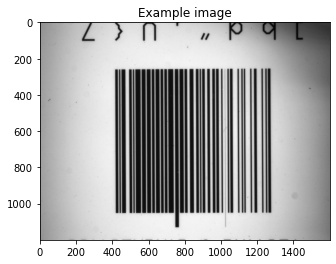

In [4]:
image = cv2.imread(image_path_example)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
plt.imshow(gray, 'gray')
plt.title('Example image');

## 1) COMPUTING REGIONS WITH HIGH HORIZONTAL DERIVATIVE AND LOW VERTICAL DERIVATIVE 

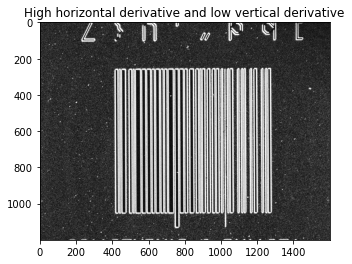

In [5]:
# Compute the Scharr gradient magnitude representation of the images in both the x and y direction using OpenCV 2.4
ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)

# Subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

plt.figure()
plt.imshow(gradient, 'gray')
plt.title('High horizontal derivative and low vertical derivative');

## 2) BLURRING

Average blur to the gradient image using a 9 x 9 kernel. This will help smooth out high frequency noise in the gradient representation of the image.

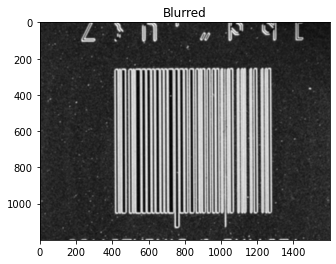

In [7]:
blurred = cv2.blur(gradient, (9, 9))

plt.figure()
plt.imshow(blurred, 'gray')
plt.title('Blurred');

Why is this operation done? Because, later we apply the closing operation for filling the box. However, if we don't blurr the image, this operation ends up in creating a lot of foreground pixels, because a lot of foreground noise is present. Instead, if we first apply the blurring operation and then the closing, we end up in a much cleaner image. Later (step 4) it will be better explained, with an example.

## 3) BINARY THRESHOLDING (OTSU'S ALGORITHM)

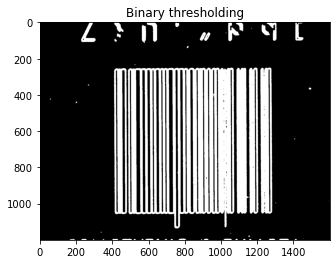

In [12]:
# Threshold, Otsu's algorithm
ret2,thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure()
plt.imshow(thresh, 'gray')
plt.title('Binary thresholding');

## 4) FILLING THE BOUNDINX BOX (CLOSING OPERATOR)

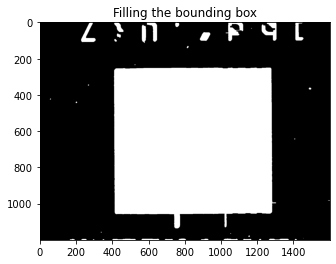

In [13]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.figure()
plt.imshow(closed, 'gray')
plt.title('Filling the bounding box');

### Why the blurring operation has been performed?
Without the blurring operation before the thresholding, a lot more of white pixels would be present in the image. Therefore, after the closing operation, the image would be with a lot of foreground pixels: the bounding box detection would be difficult. Let's see an example: the following would be the bounding box of the current image if we don't perform blurring.

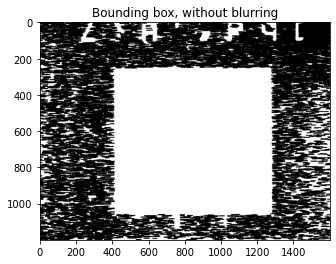

In [21]:
image_path_example_tmp = f'images/{images_paths[0]}'

image_tmp = cv2.imread(image_path_example_tmp)
gray_tmp = cv2.cvtColor(image_tmp, cv2.COLOR_BGR2GRAY)

ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)
# Subtract the y-gradient from the x-gradient
gradient_tmp = cv2.subtract(gradX, gradY)
gradient_tmp = cv2.convertScaleAbs(gradient_tmp)

ret2,thresh_tmp = cv2.threshold(gradient_tmp,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 5))
closed_tmp = cv2.morphologyEx(thresh_tmp, cv2.MORPH_CLOSE, kernel)

plt.figure()
plt.imshow(closed_tmp, 'gray')
plt.title('Bounding box, without blurring');

Let's see another example.

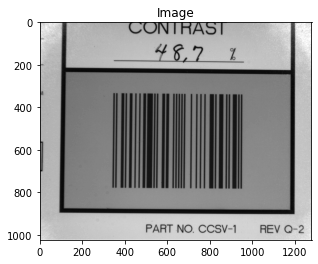

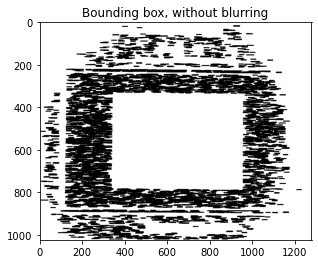

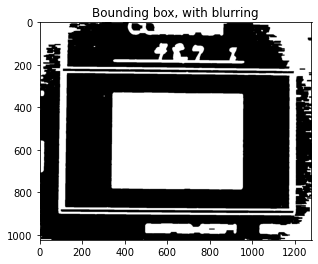

In [26]:
image_path_example_tmp = f'images/{images_paths[8]}'

image_tmp = cv2.imread(image_path_example_tmp)
gray_tmp = cv2.cvtColor(image_tmp, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray_tmp, 'gray')
plt.title('Image');

ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(gray_tmp, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray_tmp, ddepth=ddepth, dx=0, dy=1, ksize=-1)
# Subtract the y-gradient from the x-gradient
gradient_tmp = cv2.subtract(gradX, gradY)
gradient_tmp = cv2.convertScaleAbs(gradient_tmp)

ret2,thresh_tmp = cv2.threshold(gradient_tmp,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 5))
closed_tmp = cv2.morphologyEx(thresh_tmp, cv2.MORPH_CLOSE, kernel)

plt.figure()
plt.imshow(closed_tmp, 'gray')
plt.title('Bounding box, without blurring');

blurred_tmp = cv2.blur(gradient_tmp, (9, 9))

ret2,thresh_tmp = cv2.threshold(blurred_tmp,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 5))
closed_tmp = cv2.morphologyEx(thresh_tmp, cv2.MORPH_CLOSE, kernel)

plt.figure()
plt.imshow(closed_tmp, 'gray')
plt.title('Bounding box, with blurring');

### The size of the structuring element is very important
If too small, we could end up in not fully detecting our region of interest. As in the following example.

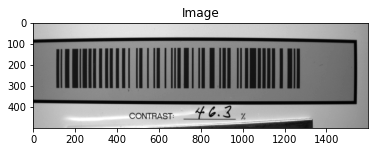

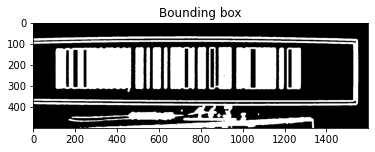

In [27]:
image_path_example_tmp = f'images/{images_paths[13]}'

image_tmp = cv2.imread(image_path_example_tmp)
gray_tmp = cv2.cvtColor(image_tmp, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray_tmp, 'gray')
plt.title('Image');

ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(gray_tmp, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray_tmp, ddepth=ddepth, dx=0, dy=1, ksize=-1)
# Subtract the y-gradient from the x-gradient
gradient_tmp = cv2.subtract(gradX, gradY)
gradient_tmp = cv2.convertScaleAbs(gradient_tmp)

blurred_tmp = cv2.blur(gradient_tmp, (9, 9))

ret2,thresh_tmp = cv2.threshold(blurred_tmp,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 1))
closed_tmp = cv2.morphologyEx(thresh_tmp, cv2.MORPH_CLOSE, kernel)

plt.figure()
plt.imshow(closed_tmp, 'gray')
plt.title('Bounding box');

As it can be seen, we are not capturing the whole region of interest. We have not created a continuous bounding box enclosing all barcodes. If, instead, we use a big enough structuring element.

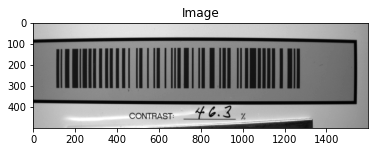

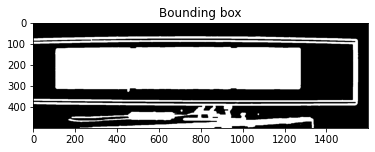

In [28]:
image_path_example_tmp = f'images/{images_paths[13]}'

image_tmp = cv2.imread(image_path_example_tmp)
gray_tmp = cv2.cvtColor(image_tmp, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray_tmp, 'gray')
plt.title('Image');

ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(gray_tmp, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray_tmp, ddepth=ddepth, dx=0, dy=1, ksize=-1)
# Subtract the y-gradient from the x-gradient
gradient_tmp = cv2.subtract(gradX, gradY)
gradient_tmp = cv2.convertScaleAbs(gradient_tmp)

blurred_tmp = cv2.blur(gradient_tmp, (9, 9))

ret2,thresh_tmp = cv2.threshold(blurred_tmp,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 5))
closed_tmp = cv2.morphologyEx(thresh_tmp, cv2.MORPH_CLOSE, kernel)

plt.figure()
plt.imshow(closed_tmp, 'gray')
plt.title('Bounding box');

Moreover, the structuring element should not be too big too, because we could end up in taking things outside the region of interest.

## 5) REMOVING THINGS OUTSIDE THE BOX (OPENING OPERATOR)

After having filled our rectangular bounding box, we want to remove things outside our box. We don't want to remove everything, but the small things, which can negatively affect the detection of the bounding box. We want to clean up a little bit the binary image.

Text(0.5, 1.0, 'Removing things outside the box')

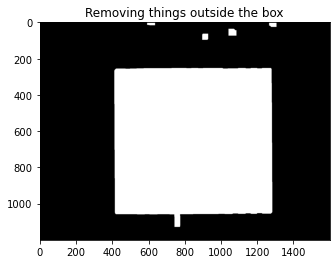

In [24]:
# Remove small things outside
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 30))
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)

plt.figure()
plt.imshow(opened, 'gray')
plt.title('Removing things outside the box')

### Why do we remove things outside the box? First reason
First of all, because garbage around our box can negatively impact the detection of the region of interest. As in the following example.

In [32]:
def plot_bounding_box(binary_image, gray_image, original_image, title=''):
    cnts = cv2.findContours(binary_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    rect = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
    box = np.int0(box)
    
    image_bb = original_image.copy()
    cv2.drawContours(image_bb, [box], -1, (0, 255, 0), 3)
    plt.figure()
    plt.imshow(image_bb, 'gray')
    plt.title(title)

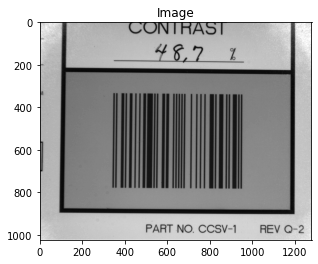

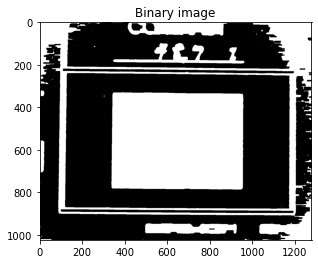

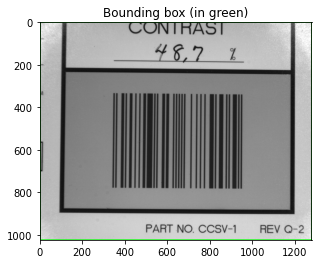

In [36]:
image_path_example_tmp = f'images/{images_paths[8]}'

image_tmp = cv2.imread(image_path_example_tmp)
gray_tmp = cv2.cvtColor(image_tmp, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray_tmp, 'gray')
plt.title('Image');

ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(gray_tmp, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray_tmp, ddepth=ddepth, dx=0, dy=1, ksize=-1)
# Subtract the y-gradient from the x-gradient
gradient_tmp = cv2.subtract(gradX, gradY)
gradient_tmp = cv2.convertScaleAbs(gradient_tmp)

blurred_tmp = cv2.blur(gradient_tmp, (9, 9))

ret2,thresh_tmp = cv2.threshold(blurred_tmp,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 5))
closed_tmp = cv2.morphologyEx(thresh_tmp, cv2.MORPH_CLOSE, kernel)

plt.figure()
plt.imshow(closed_tmp, 'gray')
plt.title('Binary image')

plot_bounding_box(closed_tmp, gray_tmp, image_tmp, title='Bounding box (in green)');

The bounding box is in green: it encloses the whole figure.

If, instead, we remove small garbage around the region of interest:

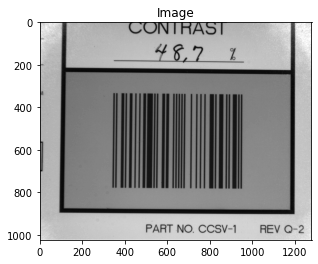

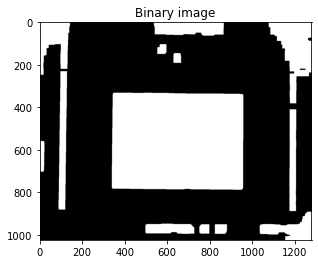

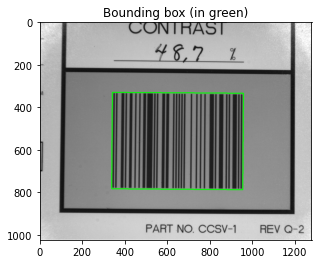

In [37]:
image_path_example_tmp = f'images/{images_paths[8]}'

image_tmp = cv2.imread(image_path_example_tmp)
gray_tmp = cv2.cvtColor(image_tmp, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray_tmp, 'gray')
plt.title('Image');

ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(gray_tmp, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray_tmp, ddepth=ddepth, dx=0, dy=1, ksize=-1)
# Subtract the y-gradient from the x-gradient
gradient_tmp = cv2.subtract(gradX, gradY)
gradient_tmp = cv2.convertScaleAbs(gradient_tmp)

blurred_tmp = cv2.blur(gradient_tmp, (9, 9))

ret2,thresh_tmp = cv2.threshold(blurred_tmp,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 5))
closed_tmp = cv2.morphologyEx(thresh_tmp, cv2.MORPH_CLOSE, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 30))
opened_tmp = cv2.morphologyEx(closed_tmp, cv2.MORPH_OPEN, kernel)

plt.figure()
plt.imshow(opened_tmp, 'gray')
plt.title('Binary image')

plot_bounding_box(opened_tmp, gray_tmp, image_tmp, title='Bounding box (in green)');

### Why do we remove things outside the box? Second reason
Because small things outside the actual box can negatively affect the orientation of the box. Like in the following example.

In [38]:
def plot_bounding_box(binary_image, gray_image, title=''):
    cnts = cv2.findContours(binary_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    rect = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
    box = np.int0(box)
    coordinates_source = box.astype('float32')
    min_width = coordinates_source[:,0].min()
    min_height = coordinates_source[:,1].min()
    max_width = coordinates_source[:,0].max()
    max_height = coordinates_source[:,1].max()
    def normalize(value, axis=0):
        if axis==0:  # Horizontal dimension
            return min_width if (value-min_width<max_width-value) \
                             else max_width
        elif axis==1:  # Vertical dimension
            return min_height if (value-min_height<max_height-value) \
                              else max_height
    coordinates_source = np.array(sorted([tuple(v) for v in coordinates_source], key=lambda t: (normalize(t[1], axis=1),
                                                                                                normalize(t[0], axis=0))))
    def dist(point1, point2):
        return np.sqrt(np.sum((point1-point2)**2))
    destination_height = int(max([dist(coordinates_source[0],coordinates_source[2]),
                             dist(coordinates_source[1],coordinates_source[3])]))
    destination_width = int(max([dist(coordinates_source[0],coordinates_source[1]),
                             dist(coordinates_source[2],coordinates_source[3])]))
    coordinates_destination = np.array([[0, 0],
                                        [destination_width-1, 0],
                                        [0, destination_height-1],
                                        [destination_width-1, destination_height-1]], dtype='float32')
    H = cv2.getPerspectiveTransform(coordinates_source, coordinates_destination)
    gray_tmp = cv2.warpPerspective(gray_image, H, (destination_width, destination_height))
    plt.figure()
    plt.imshow(gray_tmp, 'gray')
    plt.title(title);

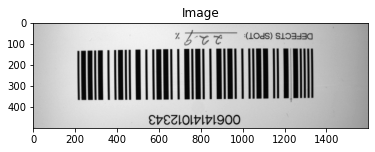

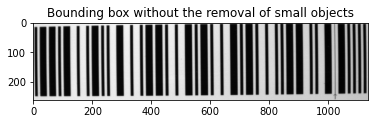

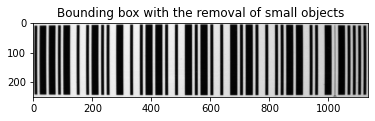

In [40]:
image_path_example_tmp = f'images/{images_paths[18]}'

image_tmp = cv2.imread(image_path_example_tmp)
gray_tmp = cv2.cvtColor(image_tmp, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray_tmp, 'gray')
plt.title('Image');

ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(gray_tmp, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray_tmp, ddepth=ddepth, dx=0, dy=1, ksize=-1)
# Subtract the y-gradient from the x-gradient
gradient_tmp = cv2.subtract(gradX, gradY)
gradient_tmp = cv2.convertScaleAbs(gradient_tmp)

blurred_tmp = cv2.blur(gradient_tmp, (9, 9))

ret2,thresh_tmp = cv2.threshold(blurred_tmp,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 5))
closed_tmp = cv2.morphologyEx(thresh_tmp, cv2.MORPH_CLOSE, kernel)

plot_bounding_box(closed_tmp, gray_tmp, title='Bounding box without the removal of small objects');

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 30))
opened_tmp = cv2.morphologyEx(closed_tmp, cv2.MORPH_OPEN, kernel)

plot_bounding_box(opened_tmp, gray_tmp, title='Bounding box with the removal of small objects');

### Degree of the opening operation (i.e. size of the structuring element)
It is important that degree of this opening operator (i.e. the size of the structuring elements) is not too high. If it is too high, the bounding box can appear as non-perfectly rotated. Examples: images 40, 41, ... .

## 6) ENLARGING THE WIDTH OF THE BOX (DILATION OPERATOR)

We slightly enlarge the width of the box, for ensuring that along the width all the bars are fully contained.

Small small dilation operation. 

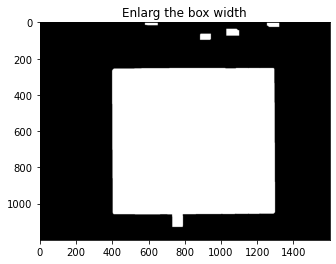

In [41]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 1))
dilated = cv2.dilate(opened, kernel, iterations=3)

plt.figure()
plt.imshow(dilated, 'gray')
plt.title('Enlarg the box width');

### Why do we apply this operation?
Because this binary image has been obtained from the gradient image. The computation of the gradient has englighted the bars positions, but it may have made them thinner. We want to be 100% sure that the box fully contain all the bars along the width.

### End of the preprocessing
After this step, we have finished the pre-processing operations. We are now sure to have a box (i.e. foreground object) containing the whole barcode. In particular:
- along the heigth, we are not interested to contain all the whole bars, since we will enlarge it (According to the X dimension) and since we will shorten each bar to the smallest bars height;
- along the width, the box is slightly bigger than the barcode, because we want to be sure to contain all the bars (since we have to compute the X dimension)

## 8) BOUNDING BOX DETECTION (OpenCV API)

Simple detection of the foreground object with a rectangle bounding box, according to its orientation. OpenCV API.

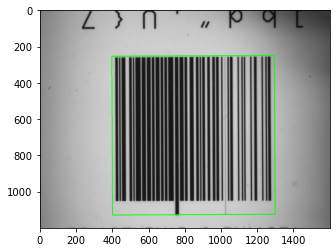

In [42]:
# Bounding box

# find the contours in the thresholded image, then sort the contours
# by their area, keeping only the largest one
cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(cnts)
cnts = imutils.grab_contours(cnts)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
#print(rect)
box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
box = np.int0(box)
#print(box)
# draw a bounding box arounded the detected barcode and display the
# image

image_bb = image.copy()
cv2.drawContours(image_bb, [box], -1, (0, 255, 0), 3)
plt.figure()
plt.imshow(image_bb, 'gray')

## 9) WARPING: REMOVAL OF PERSPECTIVE DISTORTION AND ROTATION (HOMOGRAPHY)

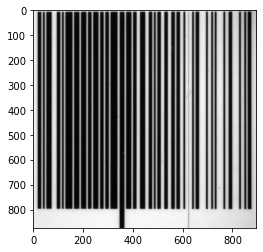

In [43]:
coordinates_source = box.astype('float32')
#print(sorted([tuple(v) for v in coordinates_source], key=lambda t: (t[1],t[0])))
#print(np.sort(coordinates_source))

min_width = coordinates_source[:,0].min()
min_height = coordinates_source[:,1].min()
max_width = coordinates_source[:,0].max()
max_height = coordinates_source[:,1].max()
def normalize(value, axis=0):
    if axis==0:  # Horizontal dimension
        return min_width if (value-min_width<max_width-value) \
                         else max_width
    elif axis==1:  # Vertical dimension
        return min_height if (value-min_height<max_height-value) \
                          else max_height
coordinates_source = np.array(sorted([tuple(v) for v in coordinates_source], key=lambda t: (normalize(t[1], axis=1),
                                                                                            normalize(t[0], axis=0))))

def dist(point1, point2):
    return np.sqrt(np.sum((point1-point2)**2))
destination_height = int(max([dist(coordinates_source[0],coordinates_source[2]),
                         dist(coordinates_source[1],coordinates_source[3])]))
destination_width = int(max([dist(coordinates_source[0],coordinates_source[1]),
                         dist(coordinates_source[2],coordinates_source[3])]))
coordinates_destination = np.array([[0, 0],
                                    [destination_width-1, 0],
                                    [0, destination_height-1],
                                    [destination_width-1, destination_height-1]], dtype='float32')

# Computing the trasformation, i.e. homography. Warping.
H = cv2.getPerspectiveTransform(coordinates_source, coordinates_destination)

# Applying the trasformation
gray1 = cv2.warpPerspective(gray, H, (destination_width, destination_height))

plt.imshow(gray1, 'gray')